# Intro
Nous avons 2 modèles pour le comportement d'un conducteur sur une route avec vitesse limitée avec des obstacles fixes ou non.

Je cherche ici à comparer les 2 modèles lors d'un fit avec des mesures. Un objectif secondaire est d'obtenir les paramètres de simulation pour ces 2 modèles.

J'utilise des mesures d'accélérations et GPS effectuées avec PhyPhox en voiture.

## Protocole expérimental
Avec un téléphone placé à plat sur l'accoudoir central, le passager déclenche la mesure avec la voiture à l'arret. Ensuite, le conducteur accèlère de manière normale jusqu'à une vitesse limite imposée par le limiteur de vitesse. Enfin, le conducteur doit ralentir jusqu'à l'arrêt sans dépasser la limite de distance imposée. Le passager stope alors la mesure et enregistre les données.

Une seconde expérience a consisté en une mesure identique mais alors que la voiture était déjà en mouvement. Lors d'un arrêt à un feu ou lors d'un changmeent de limite de vitesse.

Enfin, la troisième expérience est menée sur le même circuit que la première expérience mais en enregistrant les données GPS.

## Lecture des mesures
On affiche les données brutes d'une expérience pour voir comment les traiter.

L'expérience consiste à partir d'une position fixe, accélérer à 40 km.h-1, stabiliser la vitesse puis ralentir jusqu'à une position fixe. J'ai utilisé le limiteur de vitesse pour m'assurer de ne pas dépasser cette limite.

       Time (s)  Acceleration x (m/s^2)  Acceleration y (m/s^2)   
0      0.264811               -0.050278               -0.713472  \
1      0.266825               -0.081403               -0.735020   
2      0.268838               -0.107739               -0.730232   
3      0.270851               -0.119710               -0.739808   
4      0.272864               -0.146046               -0.732626   
...         ...                     ...                     ...   
5754  11.955947                0.162806               -0.586579   
5755  11.957958                0.227449               -0.605733   
5756  11.959970                0.251391               -0.634463   
5757  11.962010                0.248997               -0.660800   
5758  11.964050                0.229843               -0.670376   

      Acceleration z (m/s^2)  Absolute acceleration (m/s^2)  
0                   9.871593                       9.897470  
1                   9.955390                       9.982819  
2        

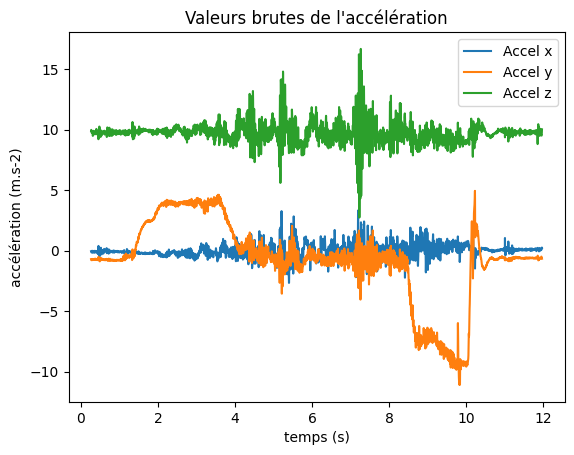

Moyenne en x -0.04
Moyenne en y -0.70
Moyenne en z 9.73


In [202]:
import numpy as np
import pandas as pd             # Lecture du CSV et stockage des mesures
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit    # Ajustement des paramètres du modèle

# Traitement des mesures
a = pd.read_csv('./RawExperiment/Acclration avec g 2024-04-22 19-32-16/Raw Data.csv')
print(a)

t = a['Time (s)']
ax = a['Acceleration x (m/s^2)']
ay = a['Acceleration y (m/s^2)']
az = a['Acceleration z (m/s^2)']

plt.plot(t, ax, label='Accel x')
plt.plot(t, ay, label='Accel y')
plt.plot(t, az, label='Accel z')
plt.title("Valeurs brutes de l'accélération")
plt.xlabel("temps (s)")
plt.ylabel("accélération (m.s-2)")
plt.legend()
plt.show()

print(f'Moyenne en x {np.mean(ax):.2f}')
print(f'Moyenne en y {np.mean(ay):.2f}')
print(f'Moyenne en z {np.mean(az):.2f}')


On voit que l'accélération longitudinale de la voiture est portée par le canal y de l'accéléromètre. On voit aussi que le bruit de l'accéléromètre augmente à mesure que la vitesse augmente : La voiture vibre.

On retrouve en z l'accélération de la pesanteur. Faisons la moyenne sur toutes les expériences. En comparant avec la valeur attendue pour g, on trouve un résultat proche, mais peu précis devant l'anomalie de Bouguer.

Je distingue les 3 lots de fichiers d'expérience (telles que décrites plus haut).

In [203]:
## Expérience départ arrêté, accélération puis freinage
l_expFileNames = [
    'Acclration avec g 2024-04-22 19-29-26',
    'Acclration avec g 2024-04-22 19-29-58',
    'Acclration avec g 2024-04-22 19-30-30',
    'Acclration avec g 2024-04-22 19-31-10',
    'Acclration avec g 2024-04-22 19-31-46',
    'Acclration avec g 2024-04-22 19-32-16',
    'Acclration avec g 2024-04-22 19-35-21',
    'Acclration avec g 2024-04-22 19-35-59',
]

## Changements de vitesse en marche
l_exp2FileNames = [
    'Acclration avec g 2024-04-22 19-37-37',
    'Acclration avec g 2024-04-22 19-38-45',
    'Acclration avec g 2024-04-22 19-40-53',
    'Acclration avec g 2024-04-22 19-41-37',
    'Acclration avec g 2024-04-22 19-42-45',
    'Acclration avec g 2024-04-22 19-50-47',
    'Acclration avec g 2024-04-22 19-51-24',
    'Acclration avec g 2024-04-22 19-54-13',
    'Acclration avec g 2024-04-22 19-55-09',
    'Acclration avec g 2024-04-22 19-55-48',
    'Acclration avec g 2024-04-22 19-49-24',
    'Acclration avec g 2024-04-22 19-50-35',
]

## Mesures GPS du départ arrêté
l_exp3FileNames = [
    'Localisation GPS 2024-04-22 19-24-40',
    'Localisation GPS 2024-04-22 19-25-52',
    'Localisation GPS 2024-04-22 19-26-36',
    'Localisation GPS 2024-04-22 19-27-17',
    'Localisation GPS 2024-04-22 19-27-57',
    'Localisation GPS 2024-04-22 19-28-33',
    'Localisation GPS 2024-04-22 19-32-56',
    'Localisation GPS 2024-04-22 19-33-34',
]


_colt = 'Time (s)'
_colx = 'Acceleration x (m/s^2)'
_coly = 'Acceleration y (m/s^2)'
_colz = 'Acceleration z (m/s^2)'

# Read all CSVs 
#================================

#Start and stop
d_pd_experiment = {}
for path in l_expFileNames :
    a = pd.read_csv('./RawExperiment/' + path + '/Raw Data.csv')
    d_pd_experiment[path] = a
# L'expérience l_expFileNames[4] n'a pas été reset et contient les donnés du fichier précédent. Je les retire
l = len(d_pd_experiment[l_expFileNames[3]])
d_pd_experiment[l_expFileNames[4]] = d_pd_experiment[l_expFileNames[4]][l:]
d_pd_experiment[l_expFileNames[4]][_colt] = d_pd_experiment[l_expFileNames[4]][_colt] - d_pd_experiment[l_expFileNames[4]].iat[0, 0]

#================================

# Break and accel
d_pd_experiment2 = {}
for path in l_exp2FileNames :
    a = pd.read_csv('./RawExperiment/' + path + '/Raw Data.csv')
    d_pd_experiment2[path] = a

#================================

# GPS
d_pd_experiment3 = {}
for path in l_exp3FileNames :
    a = pd.read_csv('./RawExperiment/' + path + '/Raw Data.csv')
    d_pd_experiment3[path] = a
    
#================================

l_accelZ = []
for key, val in d_pd_experiment.items() :
    az = val[_colz]
    print(f'Moyenne en z-x {np.mean(az):.2f}')
    l_accelZ.append(np.mean(az))
    

print(f'\nMoyenne globale en z : {np.mean(l_accelZ):.2f}')
# ref : https://dataservices.gfz-potsdam.de/panmetaworks/showshort.php?id=8039528e-3ada-11eb-9603-497c92695674
print(f'Anomalie de Bouguer à Gap environ {-87.572e-5:.1e}')
print(f'Constante g attendue : {9.806-87.572e-5:.3f}')


Moyenne en z-x 9.78
Moyenne en z-x 9.76
Moyenne en z-x 9.77
Moyenne en z-x 9.76
Moyenne en z-x 9.76
Moyenne en z-x 9.73
Moyenne en z-x 9.79
Moyenne en z-x 9.76

Moyenne globale en z : 9.76
Anomalie de Bouguer à Gap environ -8.8e-04
Constante g attendue : 9.805


On s'intéresse ici à l'accélération en y. Tentons d'extraire le vitesse à partir de l'accélération pour la première mesure. On considère $v_0 = 0$.

Pour certaines mesures je constate qu'une erreur de calibration initiale s'est insérée au cours de la mesure. Comme on a les vitesses initiales et finales qui sont nules, le moyenne de l'accélération devrait être nule aussi. Je peux retirer la moyenne à toutes les mesures de l'expérience 1. Malheureusement ce n'est pas le cas pour la seconde expérience. J'ai compensé manuellement cette calibration mais :
- il y a plus de bruit dans les données à cause de la voiture en marche
- l'erreur de calibration est plus grande quand la voiture n'est pas à l'arrêt

Je n'utilise donc pas ces données pour le fit. Cependant la forme globale des mesures confirme l'hypothèse de l'accélération et du freinage à accélération constante. Le tracé des vitesses est linéaire.

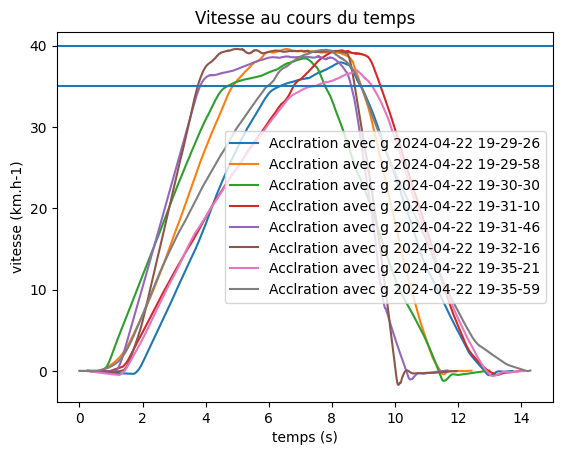

In [229]:
def integByTrapezoid(t, d):
    h = d[:-1]
    H = d[1:]
    delta = t[1:]-t[:-1]
    intg = delta*h + ((H-h)*delta)/2
    intg = np.append(intg, intg[-1])
    return np.cumsum(intg)

for key, exp in d_pd_experiment.items() :
    t = np.array(exp[_colt])
    a = np.array(exp[_coly])
    a = a - np.mean(a)
    v = integByTrapezoid(t, a)
    v = v * 3.6
    plt.plot(t, v, label=key)

plt.legend()
plt.xlabel("temps (s)")
plt.ylabel("vitesse (km.h-1)")
plt.title("Vitesse au cours du temps")
plt.axhline(y=40)
plt.axhline(y=35)
plt.show()

# L'expérience 2 est ajustée à la main mais n'est pas utilisée ici
#adjust = [0.5, 0.6, -0.15, -0.3, 0.7, 0.3, 0.8, 0.6, 0.1, 0, 0.1, 0.3]
#i = 0
#for key, exp in d_pd_experiment2.items() :
#    t = np.array(exp[_colt])
#    a = np.array(exp[_coly]) + adjust[i]
#    v = integByTrapezoid(t, a)
#    v = v * 3.6
#    plt.plot(t, a, label=key)
#    plt.title(i)
#    plt.show()
#    plt.plot(t, v, label=key)
#    plt.title(i)
#    plt.show()
#    i=i+1

Il est intéressant de comparer le profil des courbes. Certaines n'ont pas phase continue car la distance dont je dispose n'est pas assez longue pour 40km.h-1 (il aurait peut-être été mieux d'utiliser 30km.h-1). Ce sont les courbes avec l'accélération la moins forte.

Je remarque aussi que mon limiteur de vitesse s'enclenche anviron 5 km.h-1 avant la vitesse cible et ralentit l'accélération avant d'atteindre les 40 km.h-1.

Les courbes qui freinent plus fort ont aussi une petite oscillation à la fin. C'est l'effet des suspentions qui oscillent juste après l'arrêt complet. Plus le freinage est fort, plus l'effet est marqué.

On peut aussi tracer la position de la voiture en fonction du temps. On constate que la distance parcourue est à peu près 70 mètres.

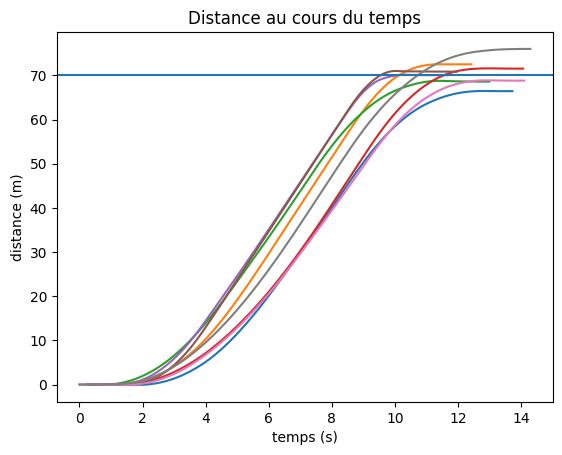

In [230]:
for key, exp in d_pd_experiment.items() :
    t = np.array(exp[_colt])
    a = np.array(exp[_coly])
    a = a - np.mean(a)
    v = integByTrapezoid(t, a)
    p = integByTrapezoid(t, v)

    plt.plot(t, p, label=key)
    
#plt.legend()
plt.xlabel("temps (s)")
plt.ylabel("distance (m)")
plt.title("Distance au cours du temps")
plt.axhline(y=70)
plt.show()

## Validation des données par mesures GPS

Comparons avec les données GPS mesurées sur le même circuit. Les données GPS confirment approximativement les mêmes valeurs de vitesse et de position. La résolution temporelle est tout de même moins bonne. C'est pourquoi j'ai choisi d'utiliser l'accéléromètre.

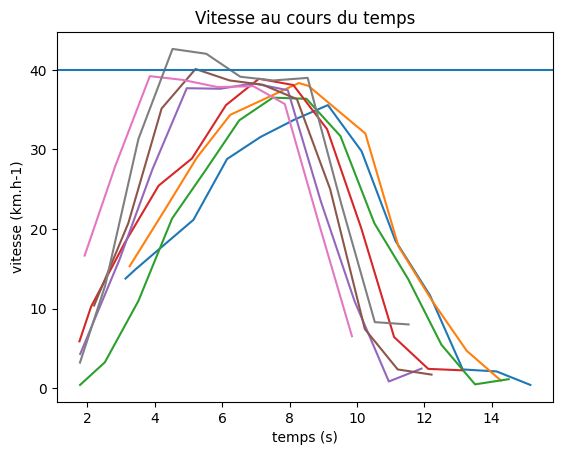

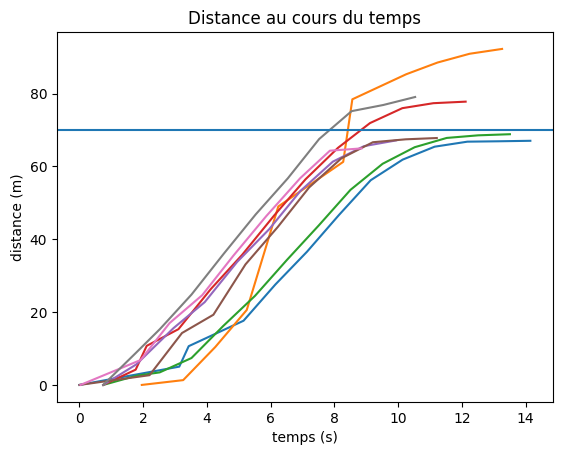

In [231]:
for key, exp in d_pd_experiment3.items() :
    t = np.array(exp['Time (s)'])
    v = np.array(exp['Speed (m/s)'])
    v = v*3.6
    plt.plot(t, v, label=key)
    
#plt.legend()
plt.xlabel("temps (s)")
plt.ylabel("vitesse (km.h-1)")
plt.title("Vitesse au cours du temps")
plt.axhline(y=40)
plt.show()

for key, exp in d_pd_experiment3.items() :
    t = np.array(exp['Time (s)'])
    p = np.array(exp['Distance (km)'])
    p = (p-p[0])*1000
    plt.plot(t, p, label=key)
    
#plt.legend()
plt.xlabel("temps (s)")
plt.ylabel("distance (m)")
plt.title("Distance au cours du temps")
plt.axhline(y=70)
plt.show()

## Fit aux modèles

Je cherche maintenant à extraire les valeurs de l'accélération lors de l'accélération et du freinage. Je vais pour cela créer un modèle pour la vitesse et fit aux données.

Le modèle considère 5 phases :
- Une phase constante de vitesse nulle avant t1
- Une phase d'accélération constante a1 jusqu'à vmax
- Une phase d'accélération nulle et à vitesse vmax
- Une phase de ralentissement d'accélération -a2 jusqu'à t2
- Après t2 une phase de vitesse nulle

On prends comme conditions de validité pour le modèle :
- t1 < t2
- vmax > 0
- a1 > 0
- a2 > 0

On voit apparaître 4 temps caractéristiques. T1 et t2 sont respectivement les temps entre les phases (1,2) et (4,5). Il nous manque les temps entre (2,3) et (3,4). Avec un calcul simple sur les équations du mouvement uniformément accéléré on obtient :
$$
t(2,3) = t_1 + \frac{v_{max}}{a_1}
$$
$$
t(3,4) = t_2 - \frac{v_{max}}{a_2}
$$

Il faut encore considérer un cas, qui est que a1 et a2 ne sont pas suffisants pour que t(2,3) < t(3,4). Dans ce cas, la droite d'accélération intercepte la droite de ralentissement en :
$$
v = a_1(t - t1) = -a_2(t - t2)
$$
$$
\Leftrightarrow t = \frac{a_1*t_1 + a_2*t_2}{a_1 + a_2}
$$

Dans ce cas il n'y aura que 4 phases et t(2,3) == t(3,4). Ce modèle est l'équivalent du premier modèle proposé pour la modélisation du comportement de l'automobiliste.

Je fit un premier modèle à une expérience manuellement avant de fit toutes les expériences.

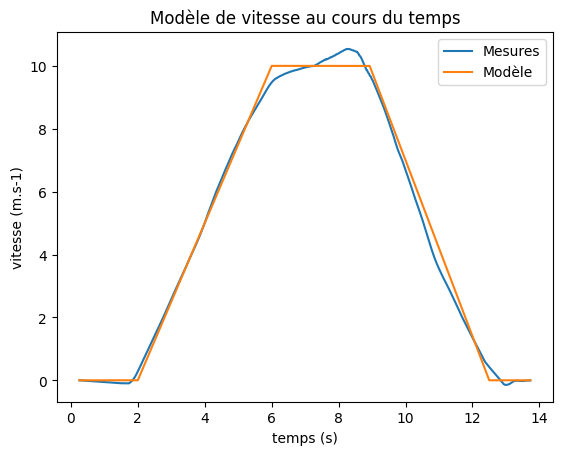

In [200]:
def modelExp1(t, a1, a2, t1, t2, vmax):
    # Les cas invalides pour la suite des calculs 
    if (t1 >= t2) or (vmax <= 0) or (a1 <= 0) or (a2 <= 0):
        return np.zeros(len(t))
    
    #Le cas général
    retval=np.zeros(len(t))
    t1end = t1 + vmax/a1
    t2begin = t2 - vmax/a2
    
    # Intersect
    if (t2begin < t1end) :
        t2begin = (a1*t1 + a2*t2)/(a1+a2)
        t1end = t2begin
    retval[t > t1] = a1*(t[t > t1] - t1)
    retval[t > t1end] = vmax
    retval[t > t2begin] = -a2*(t[t > t2begin] - t2)
    retval[t > t2] = 0
    return retval

exp = d_pd_experiment[l_expFileNames[0]]
t = np.array(exp[_colt])
a = np.array(exp[_coly])
a = a - np.mean(a)
v = integByTrapezoid(t, a)
v = v
modelData = modelExp1(t, 2.5, 2.8, 2, 12.5, 10)

plt.plot(t, v, label="Mesures")
plt.plot(t, modelData, label="Modèle")
plt.legend()
plt.xlabel("temps (s)")
plt.ylabel("vitesse (m.s-1)")
plt.title("Modèle de vitesse au cours du temps")
plt.show()

=== Solution du fit ===
a1 = 	2.4 +/-3.4e-03m.s-2
a2 = 	2.8 +/-4.3e-03m.s-2
t1 = 	1.9 +/-3.5e-03s
t2 = 	12.4 +/-3.3e-03s
vmax = 	10.1 +/-5.4e-03m.s-1
diff2 =	2.46e+02

=== Solution du fit ===
a1 = 	2.7 +/-3.2e-03m.s-2
a2 = 	4.3 +/-6.5e-03m.s-2
t1 = 	1.2 +/-2.8e-03s
t2 = 	11.2 +/-2.2e-03s
vmax = 	10.8 +/-4.1e-03m.s-1
diff2 =	1.66e+02

=== Solution du fit ===
a1 = 	2.6 +/-4.0e-03m.s-2
a2 = 	2.8 +/-4.3e-03m.s-2
t1 = 	0.8 +/-3.4e-03s
t2 = 	11.3 +/-3.3e-03s
vmax = 	10.2 +/-5.1e-03m.s-1
diff2 =	2.38e+02

=== Solution du fit ===
a1 = 	1.7 +/-1.7e-03m.s-2
a2 = 	3.3 +/-4.4e-03m.s-2
t1 = 	1.1 +/-3.5e-03s
t2 = 	12.5 +/-2.5e-03s
vmax = 	10.8 +/-5.4e-03m.s-1
diff2 =	1.90e+02

=== Solution du fit ===
a1 = 	3.8 +/-6.9e-03m.s-2
a2 = 	6.6 +/-1.6e-02m.s-2
t1 = 	1.2 +/-3.0e-03s
t2 = 	10.1 +/-2.2e-03s
vmax = 	10.5 +/-4.4e-03m.s-1
diff2 =	2.49e+02

=== Solution du fit ===
a1 = 	4.4 +/-5.1e-03m.s-2
a2 = 	7.4 +/-1.1e-02m.s-2
t1 = 	1.6 +/-1.6e-03s
t2 = 	10.1 +/-1.3e-03s
vmax = 	10.9 +/-2.6e-03m.s-1
diff2 =	9.

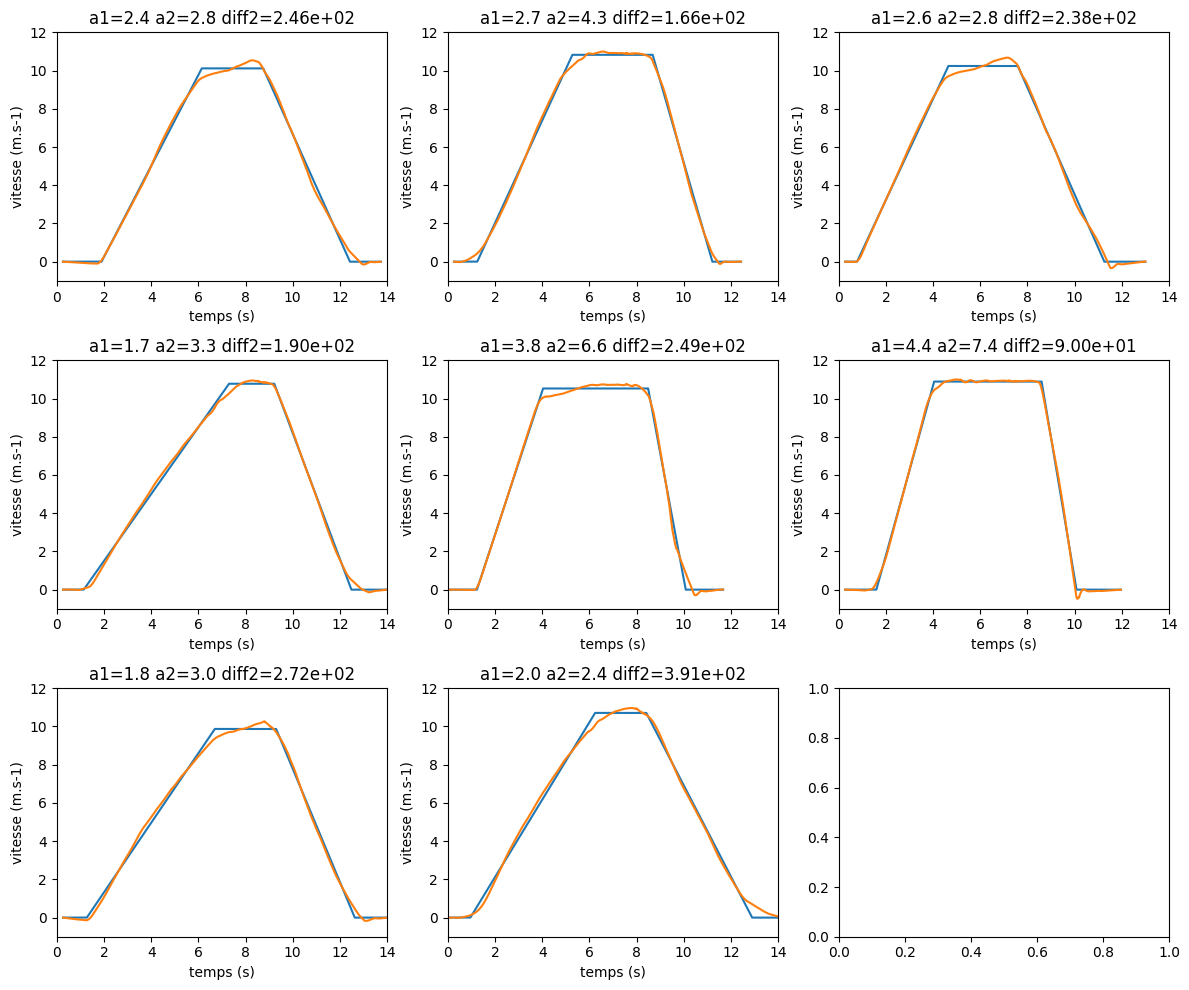

In [201]:
fig, axs = plt.subplots(3, 3, figsize=(12, 10)) 

i = 0;
for key, exp in d_pd_experiment.items() :
    t = np.array(exp[_colt])
    a = np.array(exp[_coly])
    a = a - np.mean(a)
    v = integByTrapezoid(t, a)
    solution, pcov = curve_fit(modelExp1, t, v, p0=[2.5, 2.8, 2, 12.5, 10])
    a1 = solution[0]
    a2 = solution[1]
    t1 = solution[2]
    t2 = solution[3]
    vmax = solution[4]
    
    perr = np.sqrt(np.diag(pcov))
    modelData = modelExp1(t, a1, a2, t1, t2, vmax)
    diff_quadra = np.sum(np.absolute(modelData - v)**2)
    print(f"=== Solution du fit ===")
    print(f"a1 = \t{a1:.1f} +/-{perr[0]:.1e}m.s-2")
    print(f"a2 = \t{a2:.1f} +/-{perr[1]:.1e}m.s-2")
    print(f"t1 = \t{t1:.1f} +/-{perr[2]:.1e}s")
    print(f"t2 = \t{t2:.1f} +/-{perr[3]:.1e}s")
    print(f"vmax = \t{vmax:.1f} +/-{perr[4]:.1e}m.s-1")
    print(f"diff2 =\t{diff_quadra:.2e}")
    print(f"=======================\n")
    
    ax = axs[int(i/3), i%3]
    ax.plot(t, modelData)
    ax.plot(t, v)
    ax.set_xlabel("temps (s)")
    ax.set_ylabel("vitesse (m.s-1)")
    ax.set_title(f"a1={a1:.1f} a2={a2:.1f} diff2={diff_quadra:.2e}")
    ax.set_xlim(0, 14)
    ax.set_ylim(-1, 12)
    i=i+1

plt.tight_layout(w_pad=1, h_pad=1)
plt.show()

Il est intéressant de comparer la précision du fit avec l'autre modèle. 

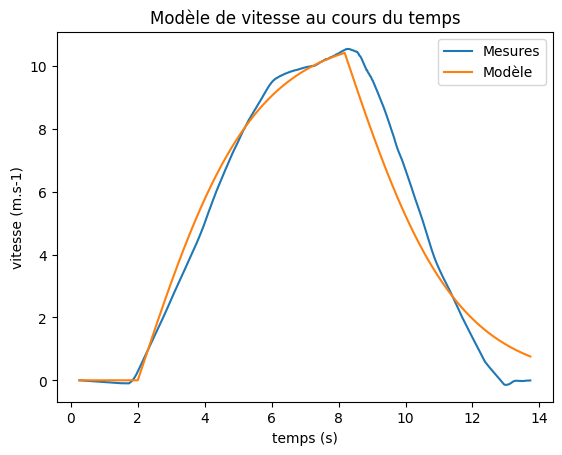

In [177]:
def getCarKinematics(l_t, a1, a2, t1, t2, vmax):
    # Les cas invalides pour la suite des calculs 
    if (t1 >= t2) or (vmax <= 0) or (a1 <= 0) or (a2 <= 0):
        return np.zeros(len(t))
    
    #Le cas général
    retval=np.zeros(len(t))
    retval[t > t1] = vmax*np.tanh(a1/vmax * (t[t > t1] - t1))
    phase2 = vmax*(1-np.tanh(a1/vmax * (t - t2)))
    diff = np.absolute(retval - phase2)
    intersect = t[np.argmin(diff)]
    retval[t > intersect] = vmax*(1-np.tanh(a1/vmax * (t[t > intersect] - t2)))
    return retval

exp = d_pd_experiment[l_expFileNames[0]]
t = np.array(exp[_colt])
a = np.array(exp[_coly])
a = a - np.mean(a)
v = integByTrapezoid(t, a)
v = v
modelData = getCarKinematics(t, 3.2, 3.2, 2, 8, 11)

plt.plot(t, v, label="Mesures")
plt.plot(t, modelData, label="Modèle")
plt.legend()
plt.xlabel("temps (s)")
plt.ylabel("vitesse (m.s-1)")
plt.title("Modèle de vitesse au cours du temps")
plt.show()

=== Solution du fit ===
a1 = 	4.0 +/-infm.s-2
a2 = 	3.2 +/-infm.s-2
t1 = 	2.4 +/-infs
t2 = 	8.9 +/-infs
vmax = 	10.4 +/-infm.s-1
diff2 =	1.24e+03

=== Solution du fit ===
a1 = 	5.5 +/-infm.s-2
a2 = 	3.2 +/-infm.s-2
t1 = 	2.0 +/-infs
t2 = 	8.7 +/-infs
vmax = 	10.8 +/-infm.s-1
diff2 =	2.34e+03

=== Solution du fit ===
a1 = 	4.3 +/-infm.s-2
a2 = 	3.2 +/-infm.s-2
t1 = 	1.2 +/-infs
t2 = 	7.8 +/-infs
vmax = 	10.6 +/-infm.s-1
diff2 =	1.29e+03

=== Solution du fit ===
a1 = 	3.8 +/-infm.s-2
a2 = 	3.2 +/-infm.s-2
t1 = 	2.2 +/-infs
t2 = 	9.3 +/-infs
vmax = 	10.3 +/-infm.s-1
diff2 =	3.96e+03

=== Solution du fit ===
a1 = 	7.9 +/-infm.s-2
a2 = 	3.2 +/-infm.s-2
t1 = 	1.8 +/-infs
t2 = 	8.5 +/-infs
vmax = 	10.5 +/-infm.s-1
diff2 =	1.83e+03

=== Solution du fit ===
a1 = 	9.2 +/-infm.s-2
a2 = 	3.2 +/-infm.s-2
t1 = 	2.0 +/-infs
t2 = 	8.6 +/-infs
vmax = 	10.9 +/-infm.s-1
diff2 =	1.94e+03

=== Solution du fit ===
a1 = 	3.7 +/-infm.s-2
a2 = 	3.2 +/-infm.s-2
t1 = 	2.1 +/-infs
t2 = 	9.4 +/-infs
vmax = 	9.7 +/

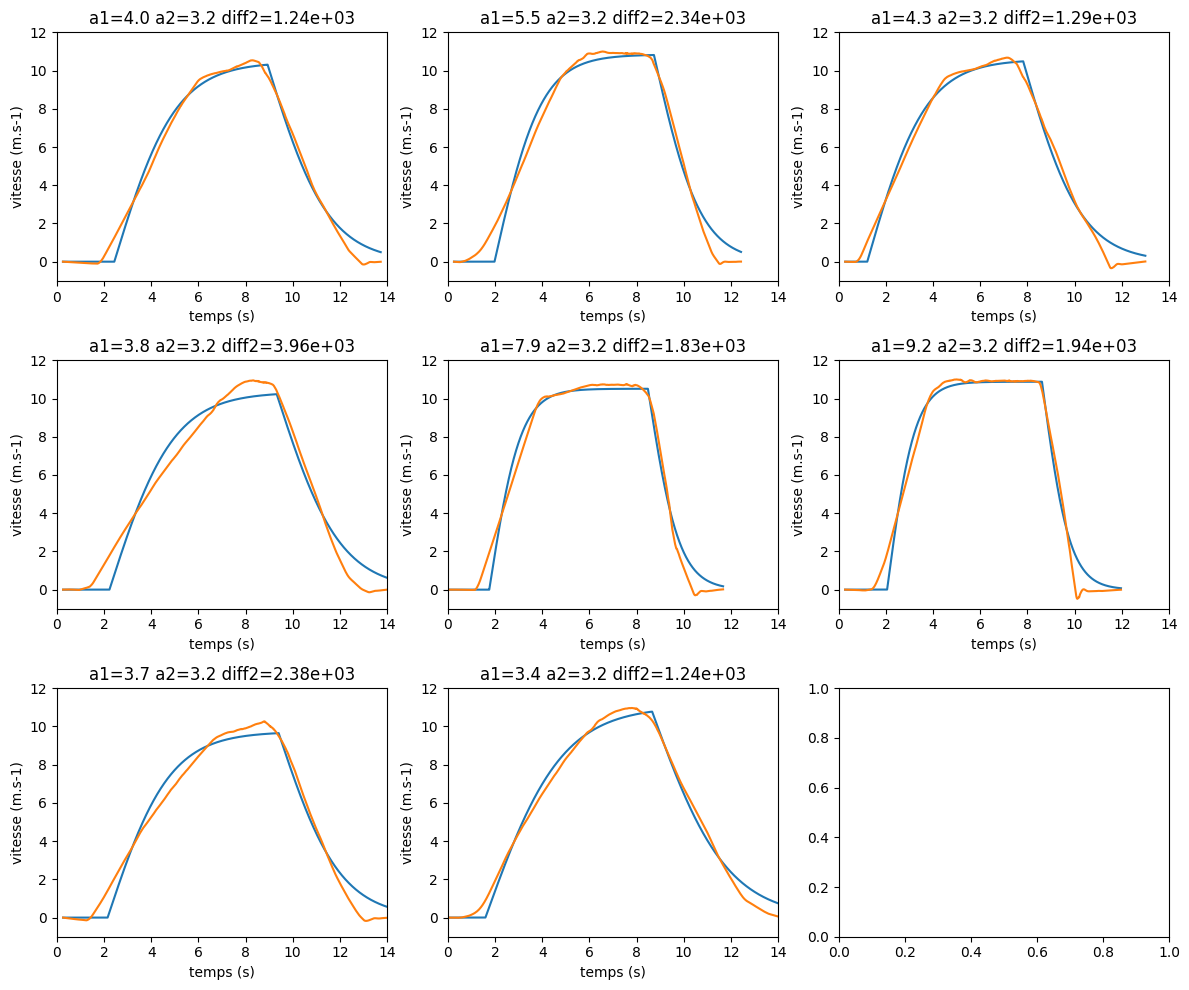

In [232]:
fig, axs = plt.subplots(3, 3, figsize=(12, 10)) 

i = 0;
for key, exp in d_pd_experiment.items() :
    t = np.array(exp[_colt])
    a = np.array(exp[_coly])
    a = a - np.mean(a)
    v = integByTrapezoid(t, a)
    solution, pcov = curve_fit(getCarKinematics, t, v, p0=[3.2, 3.2, 2, 8, 11])
    a1 = solution[0]
    a2 = solution[1]
    t1 = solution[2]
    t2 = solution[3]
    vmax = solution[4]
    
    perr = np.sqrt(np.diag(pcov))
    modelData = getCarKinematics(t, a1, a2, t1, t2, vmax)
    diff_quadra = np.sum(np.absolute(modelData - v)**2)
    print(f"=== Solution du fit ===")
    print(f"a1 = \t{a1:.1f} +/-{perr[0]:.1e}m.s-2")
    print(f"a2 = \t{a2:.1f} +/-{perr[1]:.1e}m.s-2")
    print(f"t1 = \t{t1:.1f} +/-{perr[2]:.1e}s")
    print(f"t2 = \t{t2:.1f} +/-{perr[3]:.1e}s")
    print(f"vmax = \t{vmax:.1f} +/-{perr[4]:.1e}m.s-1")
    print(f"diff2 =\t{diff_quadra:.2e}")
    print(f"=======================\n")
    
    ax = axs[int(i/3), i%3]
    ax.plot(t, modelData)
    ax.plot(t, v)
    ax.set_xlabel("temps (s)")
    ax.set_ylabel("vitesse (m.s-1)")
    ax.set_title(f"a1={a1:.1f} a2={a2:.1f} diff2={diff_quadra:.2e}")
    ax.set_xlim(0, 14)
    ax.set_ylim(-1, 12)
    i=i+1

plt.tight_layout(w_pad=1, h_pad=1)
plt.show()

## Comparaison des fit

On a une différence quadratique qui est environ 10 fois suppérieure comparé au précédent modèle. On peut donc comparer ces 2 modèles aux données et dire que le premier modèle est plus à même de modéliser et prédire ces données.

## Conclusion

En conclusion, pour le comportement mesuré, le premier modèle faisant état d'une accélération et d'un freinage constant est plus adapté. On a aussi pu extraire les valeurs d'accélération et de freinage cohérentes qui se situent :
- Pour l'accélération, entre 1.7 et 4.4
- Pour le freinage, entre 2.4 et 7.4